# Inference Tutorial

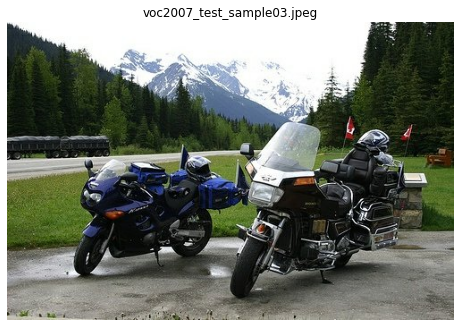

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from libs.inf import get_model, get_pred, get_pred_viz
from configs import cfg, ProjectPath


# Load pretrained yolo
PB_DIR_PATH = os.path.join(ProjectPath.VOC_CKPTS_DIR.value, 'yolo_voc_448x448')
yolo = get_model(pb_dir_path=PB_DIR_PATH)

# Load sample image
img_path = os.path.join(ProjectPath.PREVIEW_DIR.value, 'voc2007_test_sample03.jpeg')
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 12))
plt.title('voc2007_test_sample03.jpeg')
plt.axis('off')
plt.imshow(img)

## Get Inference Data

- `np.ndarray` (dtype: `np.float32`)
- `x_min`, `y_min`, `x_max`, `y_max`, `confidence`, `class_index`

In [2]:
box_preds = get_pred(img=img, model=yolo, nms_iou_thr=0.5, conf_thr=0.7, cfg=cfg)
box_preds

array([[185.38351   , 140.49567   , 410.47903   , 409.50745   ,
          0.8201422 ,  13.        ],
       [ 64.24269   , 184.83139   , 222.94661   , 373.69235   ,
          0.77533585,  13.        ]], dtype=float32)

## Get Inference Result Visualization

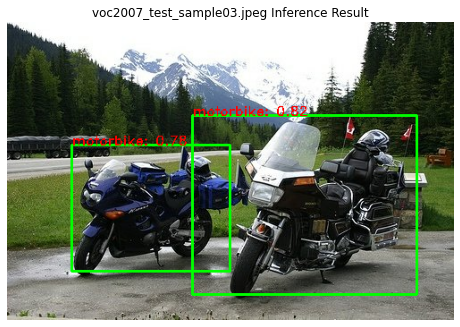

In [3]:
viz_result = get_pred_viz(img=img, model=yolo, nms_iou_thr=0.5, conf_thr=0.7, cfg=cfg)

plt.figure(figsize=(8, 12))
plt.title('voc2007_test_sample03.jpeg Inference Result')
plt.axis('off')
plt.imshow(viz_result)